<a href="https://colab.research.google.com/github/Manish91232316/IIT-Madras-Artificial-intelligence-with-Deep-lerning-Certification-Course/blob/master/0225_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x,w,b):
  return 1/(1 + np.exp(-(w*x + b)))


In [219]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
w = -1.8 #@param {type: "slider", min: -2, max: 2 ,step: 0.1}
b= 0 #@param {type: "slider", min: -2, max: 2 ,step: 0}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)


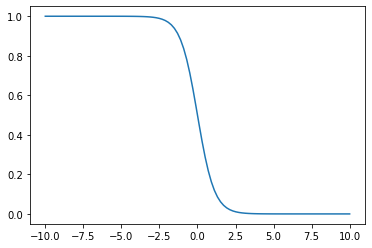

In [221]:
plt.plot(X,Y)
plt.show()

$S_{w_1,w_2}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 +b)}}$

In [0]:
def sigmoid_2d(x1 ,x2, w1, w2, b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 + b)))

In [223]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [225]:
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)
XX1,XX2 = np.meshgrid(x1, x2)
print(x1.shape,x2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b =  0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [0]:
 my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])


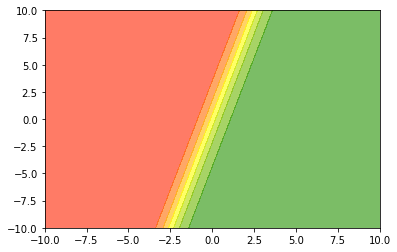

In [228]:
plt.contourf(XX1,XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

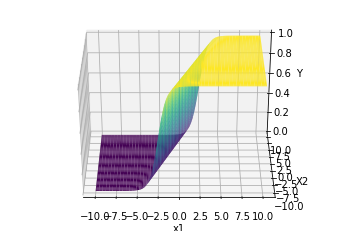

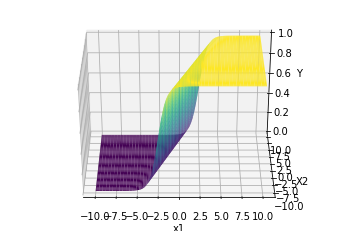

In [229]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,  cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(30, 270)
fig


#Compute Loss for a Given Dataset

In [0]:
w_unknow = 0.5
b_unknow = 0.25
X = np.random.random(25) * 20 - 10
Y = sigmoid(X,w_unknow,b_unknow)

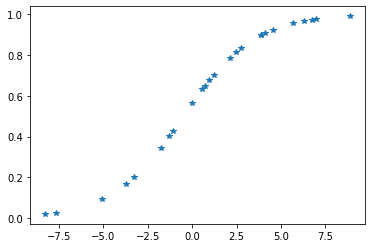

In [231]:
plt.plot(X,Y ,'*')
plt.show()

In [0]:
  def calculate_loss(X,Y,w_est,b_est):
    loss = 0
    for x,y in zip(X,Y):
      loss += (y-sigmoid(x,w_est,b_est))**2
      return loss



In [0]:
w = np.linspace(0,2,100)
B = np.linspace(-1,1,100)
WW, BB = np.meshgrid(w,B)
Loss = np.zeros(WW.shape)

In [234]:
WW.shape

(100, 100)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss [i,j]= calculate_loss(X,Y,WW[i,j],BB[i,j])

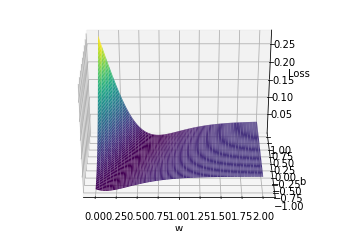

In [237]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss,  cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');
ax.view_init(30, 270)


In [0]:
ij = np.argmin(Loss)
i= int(np.floor(ij/Loss.shape[1]))
j= int(ij - i * Loss.shape[1])

In [240]:
print(i, j)

79 30


In [241]:
print(WW[i,j], BB[i,j])

0.6060606060606061 0.595959595959596


#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  def perceptron(self, x):
    return np.dot(x , self.w.T)+ self.b
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  def grad_w(self , x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred) * (1 - y_pred) *x
  def grad_b(self , x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred) *y_pred * (1 - y_pred)
  def fit(self, X, Y, epochs = 1, learning_rate=1, initialise = True, display_loss=False):
    # initialise w,b
    if initialise:
     self.w= np.random.randn(1, X.shape[1])
     self.b = 0 
    if display_loss:
      loss ={}  
    for i in tqdm_notebook(range(epochs), total=epochs, unit='epochs'):
      dw = 0
      db = 0
      for x,y in zip(X, Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= learning_rate *dw
      self.b -= learning_rate *db
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred , Y)
    if display_loss:
      plt.plot(loss.values()) 
      plt.xlabel('Epochs') 
      plt.ylabel('Mean Squared Error') 
      plt.show()


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred= self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)





#Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1],[3, 1.25], [2, 4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [309]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [0]:
def plot_sn(X, Y, sn , ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j] , X2[i]])
      YY[i,j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha= 0.6)
  ax.scatter(X[:,0], X[:,1], cmap=my_cmap)
  ax.plot()  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.54764218  1.04670793]] [-0.01401936]



[[-0.61770768  1.00079204]] [-0.02833513]



[[-0.68909694  0.94815677]] [-0.04288307]



[[-0.76133778  0.88802188]] [-0.05761433]



[[-0.83385819  0.81945521]] [-0.07248732]



[[-0.90597634  0.74137141]] [-0.08747081]



[[-0.97685088  0.65268424]] [-0.10250059]



[[-1.04525668  0.55298229]] [-0.11731337]



[[-1.10920876  0.44386428]] [-0.13131241]



[[-1.16615831  0.33011368]] [-0.14367979]



[[-1.21409247  0.22004425]] [-0.15345141]



[[-1.25244537  0.12329266]] [-0.16003081]



[[-1.2823971   0.04449315]] [-0.16396768]



[[-1.30606381 -0.01820577]] [-0.1662904]



[[-1.32532942 -0.06872661]] [-0.16772857]



[[-1.34150165 -0.11040341]] [-0.16867557]



[[-1.35543363 -0.14559316]] [-0.1693348]



[[-1.36768673 -0.17590673]] [-0.16981532]



[[-1.37864157 -0.20245752]] [-0.17017892]



[[-1.38856506 -0.22603371]] [-0.17046253]


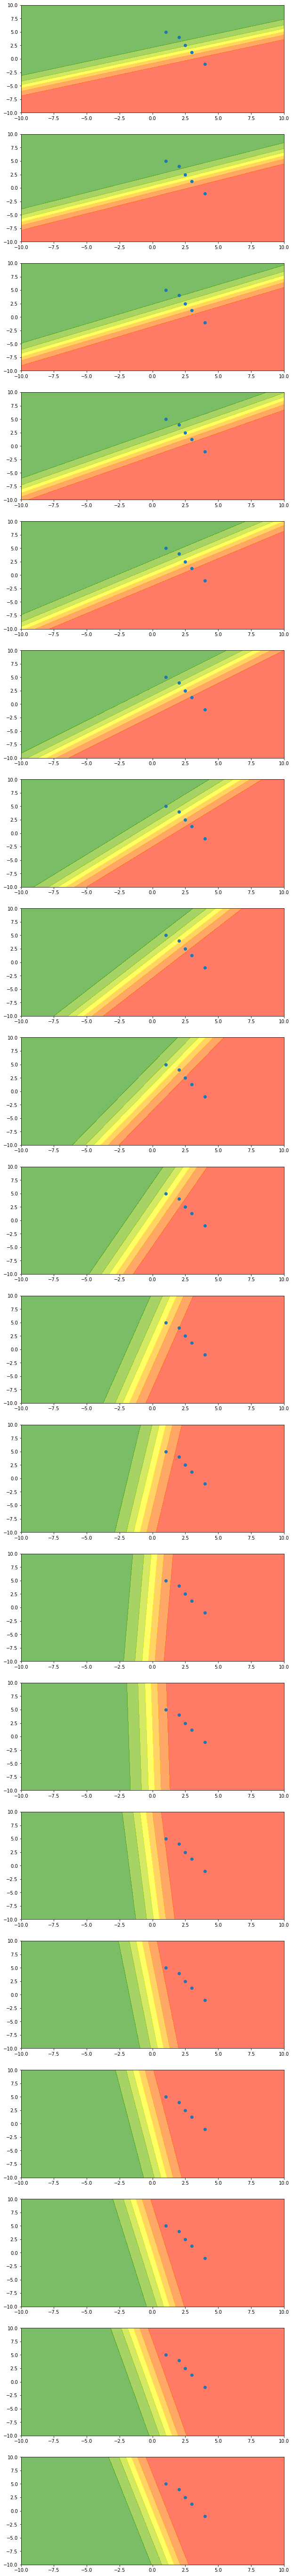

In [311]:

sn.fit(X, Y, 1, 0.05, True)
N=20
plt.figure(figsize=(10, N*5))

for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N , 1, i + 1)
  plot_sn(X, Y, sn , ax)
  sn.fit(X, Y, 1, 0.05, False)

# Load data

In [248]:
!wget https://drive.google.com/drive/u/0/my-drive



--2020-04-28 10:32:25--  https://drive.google.com/drive/u/0/my-drive
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.100, 172.217.203.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/u/0/my-drive&followup=https://drive.google.com/drive/u/0/my-drive [following]
--2020-04-28 10:32:25--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/drive/u/0/my-drive&followup=https://drive.google.com/drive/u/0/my-drive
Resolving accounts.google.com (accounts.google.com)... 172.217.203.84, 2607:f8b0:400c:c15::54
Connecting to accounts.google.com (accounts.google.com)|172.217.203.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘my-drive.1’

my-dr

In [249]:
!ls

mobile_cleaned.csv  my-drive  my-drive.1  sample_data


In [0]:
Data = pd.read_csv("mobile_cleaned.csv")

In [251]:
Data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.00,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.00,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.00,1,1,7,4,6,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,5.0,15,3,0,0,179.0,18,3,5990,11,720,17,3,1,5.00,1,1,7,4,6,4,1,6,91.0,32.0,6,3,3000,165,0


In [252]:
Data.shape

(109, 40)

In [0]:
X = Data.drop('brand_rank',axis=1)

In [0]:
Y=Data['brand_rank'].values

In [255]:
Y

array([29, 11, 27,  4,  4,  4, 30,  4,  4,  4,  4,  2, 20,  6, 18, 30,  7,
       11,  2, 17,  4, 11, 27,  4, 11, 16, 16, 18,  5,  6, 10, 11,  3,  6,
        6, 11,  5, 30,  4,  2,  4, 19, 11, 14,  6, 11,  3,  5, 11,  3,  2,
        4,  2,  2,  5,  8, 11, 12,  6,  3, 11, 10,  2, 11,  2, 11,  3,  8,
        8,  5,  5, 12,  1,  5,  2,  8, 12, 15, 11,  2,  6,  3,  8,  8, 10,
        2,  2,  9, 15,  2,  3,  1,  9,  1,  1,  5,  9,  8,  2,  1,  2,  1,
        2,  8, 25,  2,  1,  1, 12])

In [0]:
threshold = 4.2
Data['Class'] = (Data['brand_rank'] >= threshold).astype(np.int)

In [257]:
Data['Class'].value_counts(normalize=True)

1    0.59633
0    0.40367
Name: Class, dtype: float64

In [0]:
Y_binarised = Data['Class'].values

#Standardisation

In [0]:
R = np.random.random([100,1])

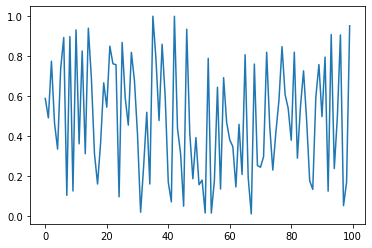

In [260]:
plt.plot(R)
plt.show()

In [261]:
np.mean(R)

0.48368683208630187

In [262]:
np.std(R)

0.28599233605842433

In [0]:
scaler=StandardScaler()

In [264]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [265]:
scaler.mean_

array([0.48368683])

In [0]:
RT = scaler.transform(R)

In [267]:
np.mean(RT)

-1.176836406102666e-16

In [268]:
np.std(RT)

1.0

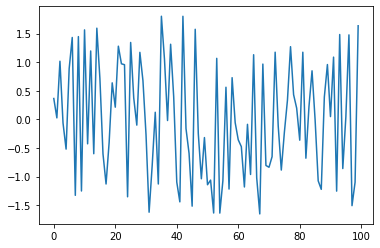

In [269]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [271]:
print(X_train.shape,X_test.shape)

(81, 39) (28, 39)


In [0]:
scaler= StandardScaler()

In [0]:
 X_scaled_train= scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [0]:
 minmax_scaler= MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
#Y_scaled_test = minmax_scale.fit_transform(Y_test)

In [276]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.fit_transform(Y_test.reshape(-1,1))

In [0]:
#np.min(Y_scaled_test)max
scaled_threshold =list( minmax_scaler.transform(np.asarray([threshold]).reshape(-1,1)))[0][0]

In [278]:
scaled_threshold

0.11428571428571428

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold ).astype('int').ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold ).astype('int').ravel()

In [281]:

Y_binarised_test

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1])

In [282]:
Y_binarised_train

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


TypeError: ignored

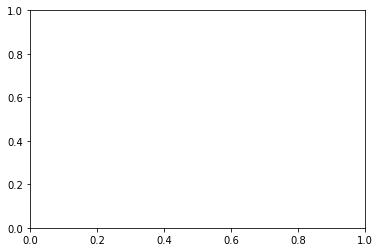

In [302]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=1000 , learning_rate=0.01, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold ).astype('int').ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold ).astype('int').ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train )
accuracy_test = accuracy_score(Y_pred_binarised_test, Y_binarised_test )

In [306]:
print(accuracy_train, accuracy_test)

0.43209876543209874 0.5714285714285714
